# Linear regression


## Outline

<code>**1 degree polynomial , line**</code>:
\begin{multline*}
y = mx + b
\end{multline*}

<code>**m slope**</code>:
\begin{multline*}
m = \dfrac{\overline{x} \ \overline{y} - \overline{xy}}{(\overline{x})^2 - \overline{x^2}}
\end{multline*}

<code>**b intersept**</code>:
\begin{multline*}
b = \overline{y} - m\overline{x}
\end{multline*}

In [6]:
import random
import numpy as np
from statistics import mean
from matplotlib import pyplot as plt

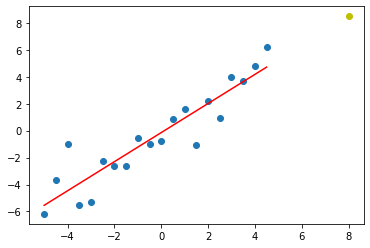

In [79]:
xs  = np.arange(-5, 5, 0.5) 
ys  = 1*(xs)  + 1*np.random.normal(size=len(xs))   

# xs = np.array([1,2,3,4,5,6], dtype=np.float64)
# ys = np.array([5,4,6,5,6,7], dtype=np.float64)
plt.scatter(xs, ys)

def best_fit(xs, ys):
    m = ((mean(xs) * mean(ys)) - mean(xs*ys)) / (mean(xs)**2 - mean(xs**2))
    b = mean(ys) - m*mean(xs)
    return m, b
    # PEMDAS
    # ----------------
    # P parentheses
    # E exponents
    # M multiplication
    # D division
    # A addition
    # S substraction 
m, b = best_fit(xs, ys)
line = [(m*x) + b for x in xs]
plt.plot(xs, line , c='r')

def predict(x):
    return m*x + b
x = 8
y = predict(x)
plt.scatter(x,y, c='y')

## The accuracy of fit line

Right now, we can easily look at the data and decide how accurate the regression line.However, when your linear regression model is applied within <code>**20 hierarchical layers**</code> in a neural network its not going to be so obvious. And not only this but your model works in steps of say 100 data points at a time, within a dataset of 5 million datapoints. You're going to need some sort of automated way of discovering how good your best fit line actually is.<br>

<code>**R squared - coefficient of determination theory**</code><br>
Model can have a prediction and prediction can have certain accuracy and confidence.
<br>
To determine this accuracy we have to calculate coefficient of determination and thats done by using squared error.
Basically squared error is the squared distance between the point and the best fit line. We are squaring it because the distance can be negative and postive depending on the line and point that we are measuring. And we use square and not  absolute value to eliminate the effect of outliers (points that happend to be very far away from best fit line). And we have to penalize for outliers and we can raise our residuals even by 4, 6 and forth on but the standart is 2. 

## Outline

<code>**R²**</code>:
\begin{multline*}
r^2 = 1 - \dfrac{SE\hat{y}}{SE \ \overline{y}}
\end{multline*}

Let's calculate it in Python

In [13]:
def se(ys, line):
    return sum((line - ys)**2)

def coefficient_of_determination(ys,line):
    y_mean_line = [mean(ys) for y in ys]
    squared_error_regr = se(ys, line)
    squared_error_y_mean = se(ys, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

rsq = coefficient_of_determination(ys,line)
rsq

0.4508983016758591

In [31]:
def create_dataset(size, var, step=2, cor=False):
    ys  = []
    val = 1
    for i in range(size):
        y = val + random.randrange(-var, var)
        ys.append(y)
        if cor and cor == True:
            val +=step
        elif cor and cor == False:
            val -=step
    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

rsq: 0.8203051746268796


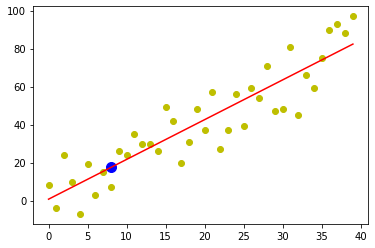

In [34]:
xs, ys = create_dataset(40, 20, 2, cor=True)
def best_fit(xs, ys):
    m = ((mean(xs) * mean(ys)) - mean(xs*ys)) / (mean(xs)**2 - mean(xs**2))
    b = mean(ys) - m*mean(xs)
    return m, b
    # PEMDAS
    # ----------------
    # P parentheses
    # E exponents
    # M multiplication
    # D division
    # A addition
    # S substraction 
m, b = best_fit(xs, ys)
line = [(m*x) + b for x in xs]
plt.plot(xs, line , c='r')

def predict(x):
    return m*x + b
x = 8
y = predict(x)
rsq = coefficient_of_determination(ys,line)
print(f'rsq: {rsq}')
plt.scatter(xs,ys, c='y')
plt.scatter(x, y, s=100, c='b')